In [8]:
import sys
sys.path.append('../classes/')
sys.path.append('../utils/')

import numpy as np
from scipy.io import mmread
import matplotlib.pyplot as plt
import networkx as nx
import AndersonGraph
import numba


plt.style.use('dark_background')


ModuleNotFoundError: No module named 'numba'

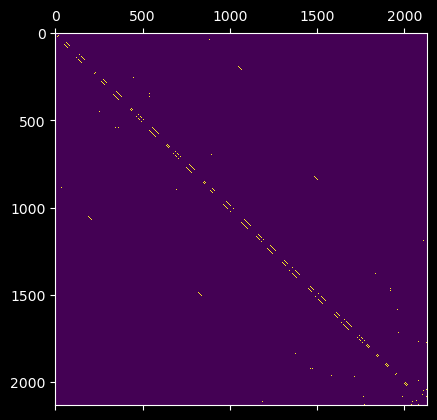

In [3]:
blackhole = mmread('../utils/blckhole.mtx')
blackhole.setdiag(0)

plt.matshow(blackhole.todense())

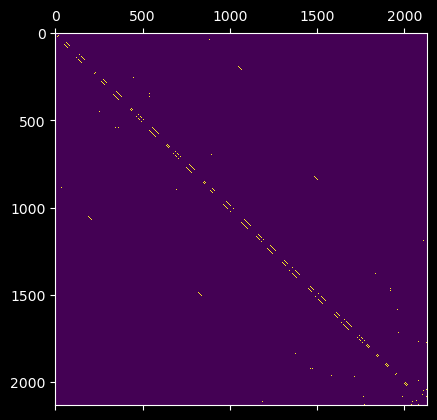

In [4]:
psi0 = np.zeros(blackhole.shape[0])
psi0[0] = 1
bh = AndersonGraph.AndersonGraph(nx.from_scipy_sparse_array(blackhole), psi0, [0,0], 1)
plt.matshow(nx.to_numpy_array(bh.graph))

In [5]:
layout = nx.fruchterman_reingold_layout(bh.graph)

In [6]:
history = bh.simulate(10, 100)
print(history)

[array([1., 0., 0., ..., 0., 0., 0.]), array([1.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]), array([ 9.74793776e-01-1.69330741e-03j, -9.96234611e-03+9.86320752e-02j,
       -4.95989823e-03-1.01390898e-03j, ...,
        9.62105638e-51-1.78246363e-50j,  1.62848414e-52+8.84116747e-53j,
       -1.96878700e-54+3.60908348e-54j]), array([ 9.02685497e-01-1.29765165e-02j, -3.70650031e-02+1.83621429e-01j,
       -1.82113826e-02-7.72208505e-03j, ...,
        2.63159214e-37+3.33841953e-38j, -1.10610468e-39+8.11807023e-39j,
       -6.05558183e-40-9.05601276e-41j]), array([ 7.93443834e-01-4.07535622e-02j, -7.36993047e-02+2.44277646e-01j,
       -3.53776796e-02-2.39987894e-02j, ...,
        4.86282211e-42-7.40767682e-42j,  7.69280295e-44+5.25006571e-44j,
       -1.41158349e-45+1.70773719e-45j]), array([ 6.61006122e-01-8.72731823e-02j, -1.09458374e-01+2.75050098e-01j,
       -5.07010057e-02-5.06259930e-02j, ...,
        4.56524443e-38-4.71199537e-38j,  6.61384793e-40+6.37817451e-40j,
       -1

MovieWriter PillowWriter unavailable; using Pillow instead.


IndexError: list index out of range

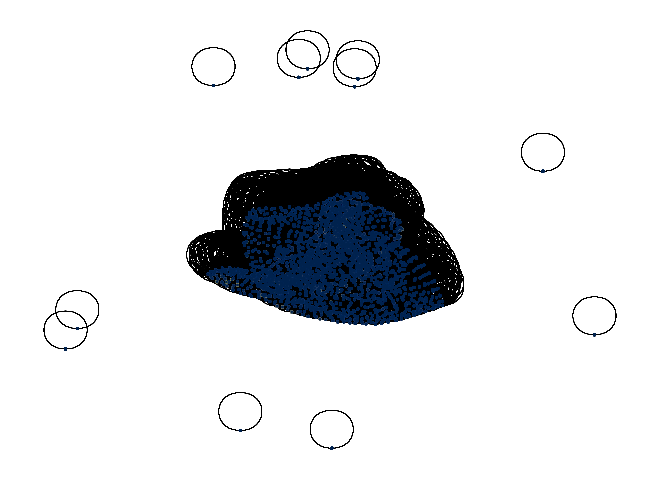

In [7]:
from matplotlib.animation import FuncAnimation

def update(frame):
    density = np.real(np.multiply(history[frame].conj(), history[frame]))
    nx.draw(bh.graph, layout, node_size=1, width=0.06, cmap=plt.cm.cividis, node_color=density)

ani = FuncAnimation(plt.gcf(), update, frames=range(0, 1000), interval=20, repeat=True)
ani.save('blackhole.gif', writer='PillowWriter')